In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

Our customer is "Some LLC Inc" (for example) Construction Company. The company is asking to create a model (program) that calculates the average price of houses in different areas of California when building their next house. <br>
Information provided to us: California census results. <br>
The data includes values such as population, median income, and median home prices for each area (called a block) of California. Each area has an estimated population of 600 to 3,000.<br>
So, our task is to create a model (program) that determines the median price of houses in different areas based on the above data.

<h1><b>1.1 Understanding processes</b></h1><br>
The first thing we do is gather more information about the project. It helps us to approach the project correctly, choose the right model, and determine what algorithms to use.<br>

For example, the first question is: Where is this model used? The client said that the output from our model, along with other, unknown data, would be fed back into the input of another model, and the final model would decide whether or not to invest in the specified area.
<br>
So our model is connected to a larger model.
<br>
Next question: What method is currently used by the buyer to determine the median price, and how accurate is the current method, and what are its disadvantages?
<br>
Answer: Currently, the prices for the area are determined manually based on the analysis of several experts. Accuracy 20%.
<br>
Now let's go to the next stage.

<h1><b>1.2 Defining an analytical approach</b></h1><br>
At this stage we can clarify a few things:
<br>

* Model: Supervised, Unsupervised, Reinforcement?
* Algorithm: classification, regression, or other type
* Method: Online or offline<br>

We will answer the above questions:
<br>

1.Supervised learning - because we have a label in the data. This is the median price in the area. We want to predict exactly this price.<br>
2.Regression - Did we say "prediction" (prognosis) is solved using regression algorithms<br>
3.Offline - because the data has already been given to us once. There is no constant data flow.<br>

How do we assess model accuracy?
<br>
There are different ways to estimate the accuracy, but for regression algorithms, Root Mean Square Error (RMSE) is often used: <br> <br>
<img src="https://i.imgur.com/aXL9iWa.png" /><br> <br>

Here:

* *m* - the number of rows in the dataset (each row is one piece of data)
* *x(i)* - vector of all parameters for row (except label)
* *y(i)* - label for row (median house price in our example)
* *X* - all parameters except label
* *h* - the prediction (hypothesis) returned from your model.
    * *h(x(i))* - the prediction returned by the model for the row.

**DataFrame**

In [2]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each line of the dataset is information about one area (neighbourhood, quarter, block). The dataset consists of 10 columns:

* *longitude* and *latitude* together are GPS coordinates
* *housing_median_age* - median age of houses
* *total_rooms* - total rooms available in this area
* *total_bedrooms* - total bedrooms available in this area
* *population* - population of the area
* *households* - the number of families in the area
* *median_income* - median income
* *median_house_values* - median price of houses
* *ocean_proximity* - how close the area is to the ocean

<h1><b>2.1 Data analysis</b></h1><br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Conclusions from the above result:**

* The dataset consists of 20640 rows (each row is a separate area (block, neighborhood, quarter))
* The data in the *total_bedrooms* column is incomplete (20433 rows are complete, the remaining 207 have no data)
* All columns except the *ocean_proximity* column are numeric.

we see the ocean_proximity column:

In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

So this column stores how far the houses are from the ocean as text.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Another way to analyze data is visualization**

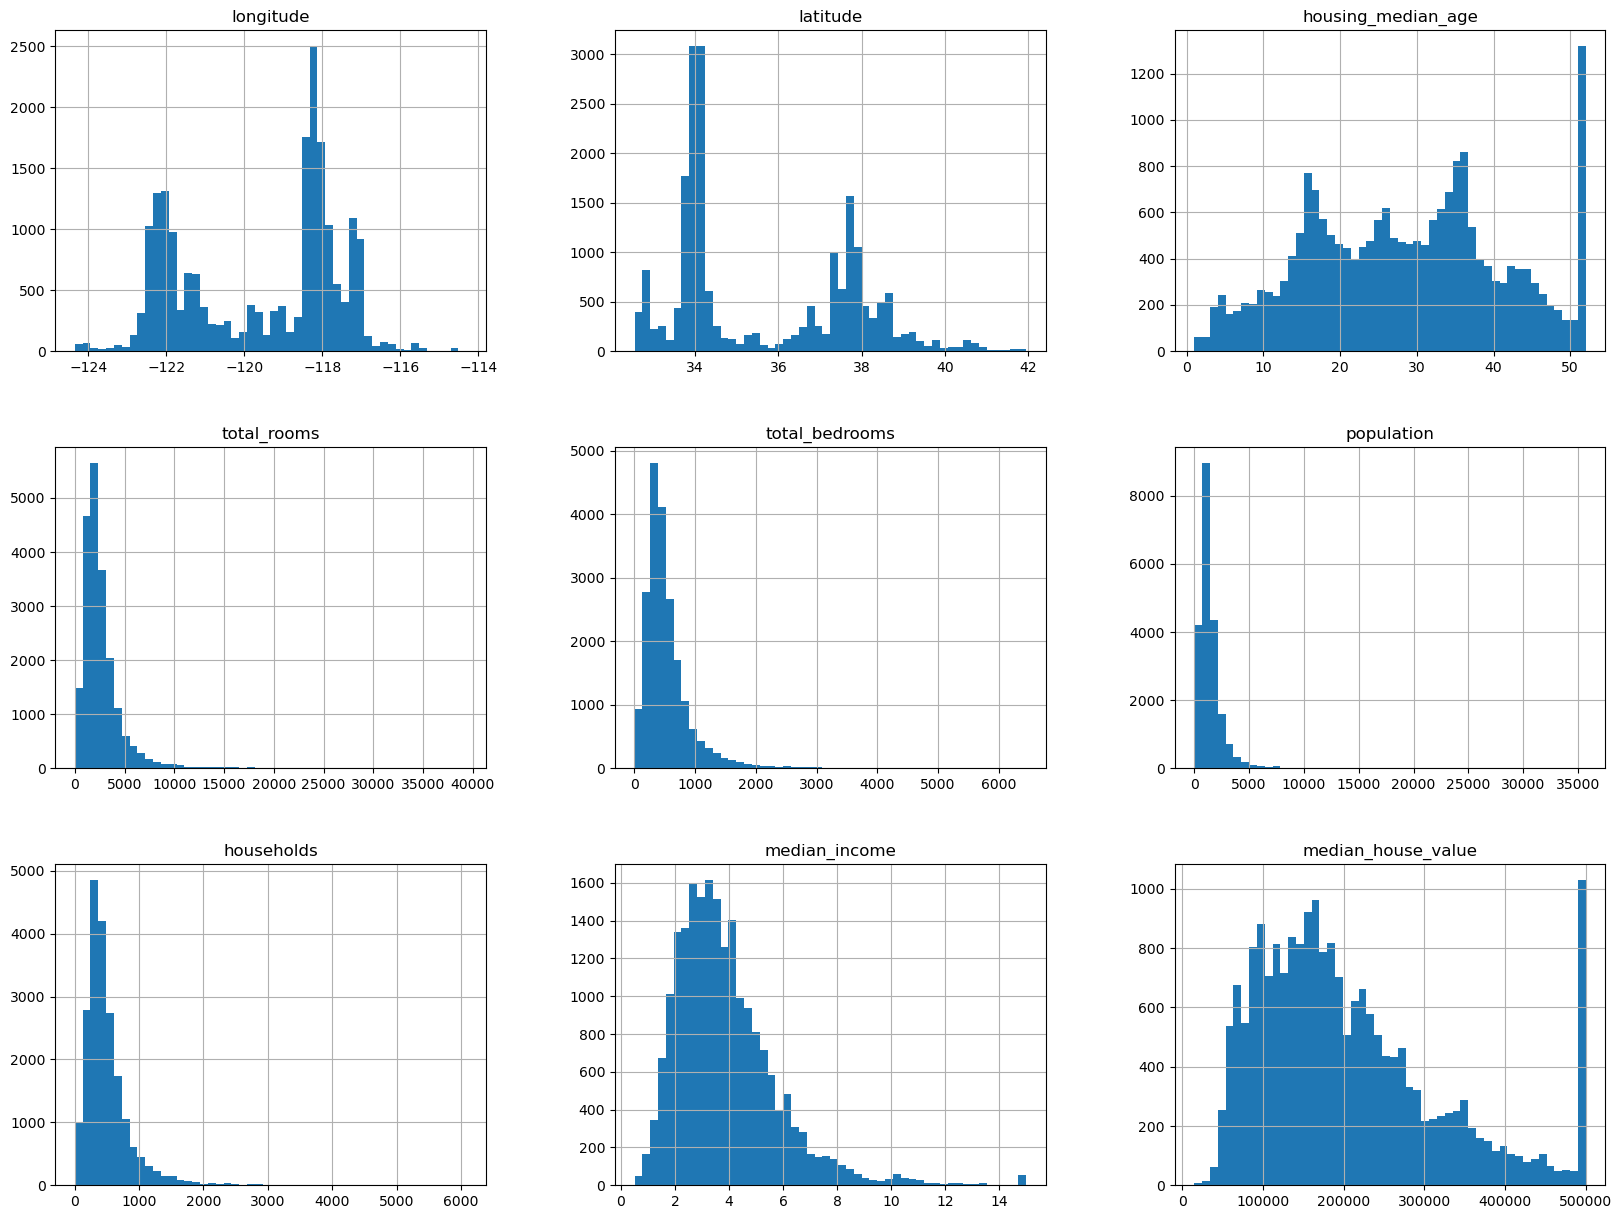

In [6]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

We continue the analysis:

1. *median_income* - the numbers in the column are unclear (what does a 1-digit number mean?). After talking to the customer, we know that the numbers are in thousand dollars (ie 4 is $4000).

2. In the *housing_median_age* (median age of houses) graph, 50-year-old houses suddenly exceeded one. We will clarify this with the client: when the data is compiled, all houses over 50 years old are included as 50 (there may be 60-70-100-year-old houses). That is, there is a limit to the data.

3. This is also the case with *median_house_value* (median price of houses), houses with a price of more than $500,000 are all written as 500,000. And this is not good for us. The reason is that the model we built cannot correctly estimate houses worth more than 500,000. 

There are 2 ways ahead of us:
* Data collection for expensive houses
* Excluding areas with houses worth more than 500,000 from the dataset.


The data distribution is skewed (not bell-shaped), preferably a normal distribution for ML (we'll see how to fix this later).

<img src="https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width="500"/>

**Drop values of housing_median_age equal to 52**

In [7]:
df = df[df['housing_median_age'] < 52]

**Drop values of median_house_value equal to 500_000**

In [8]:
df = df[df['median_house_value'] < 500_000]

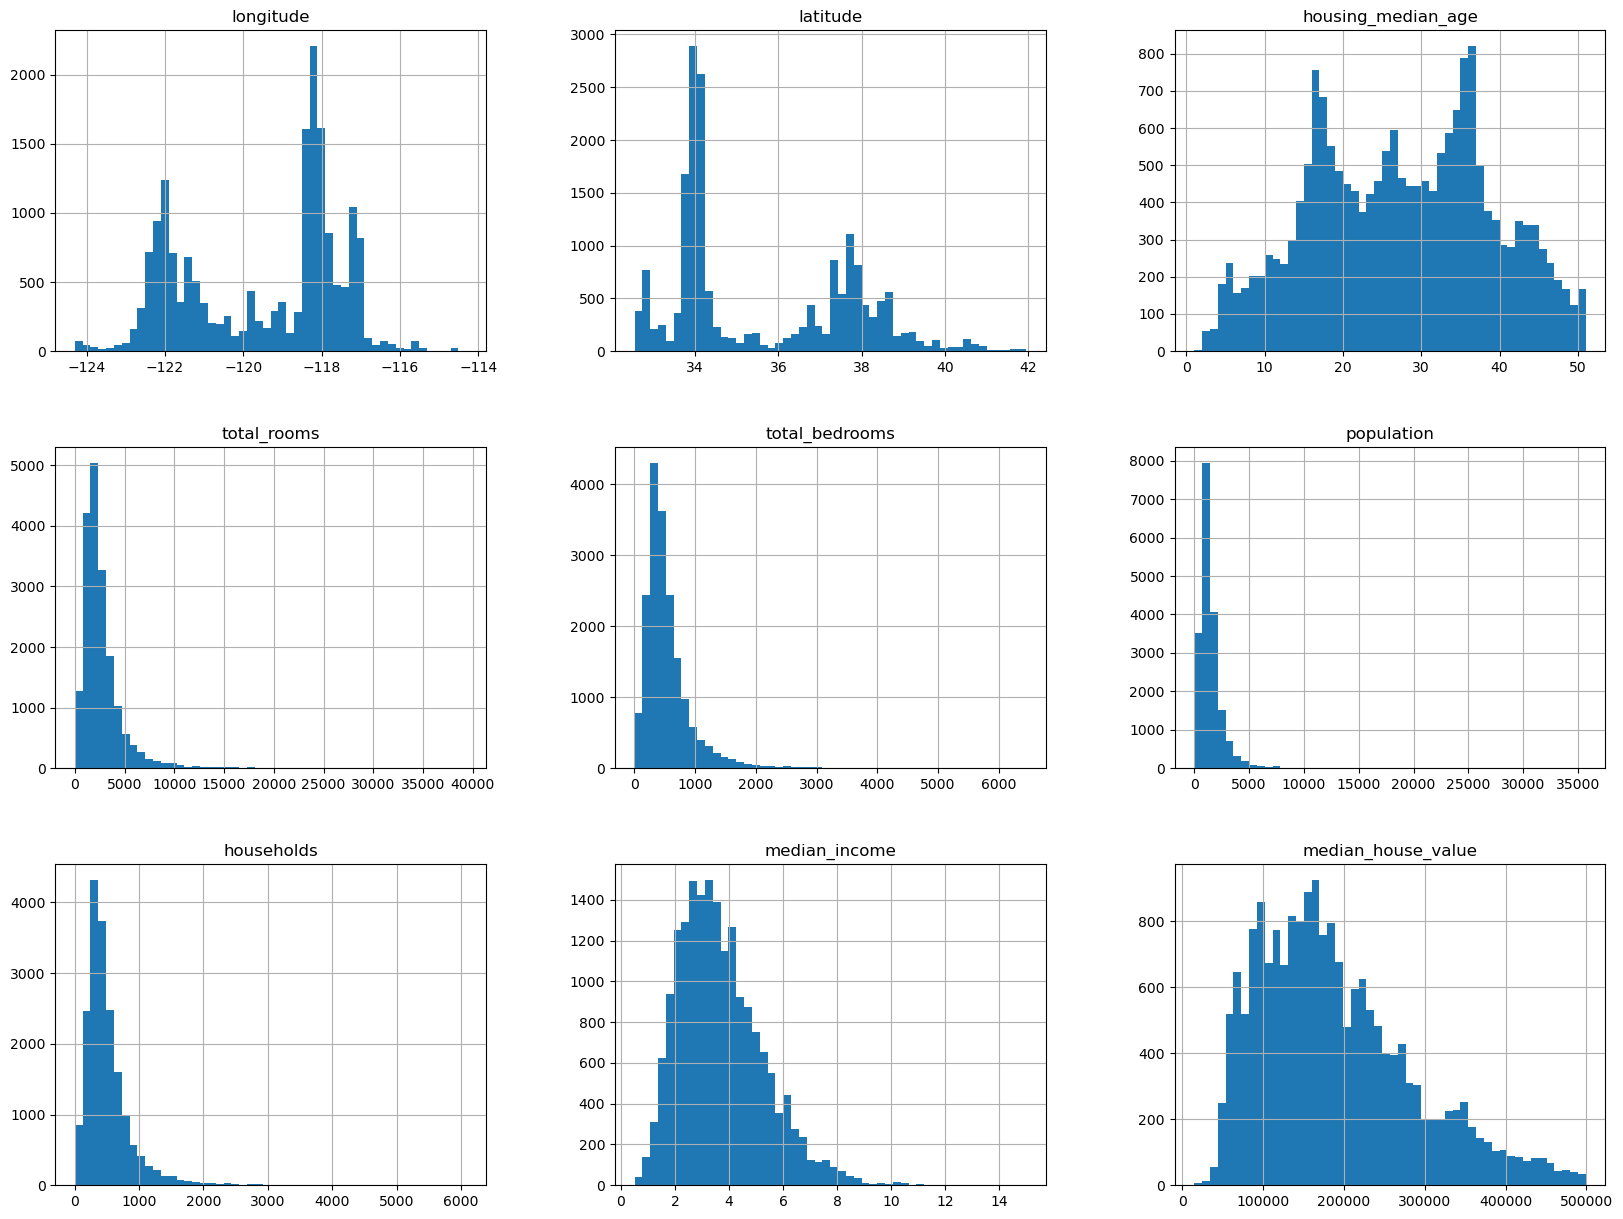

In [9]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()